### Ekkapob Poonsawat
### ID.60199130182
### e-mail: ekkapob.poonsawat@g.swu.ac.th

-------------------------------------------------------------------------------------------------------------------------------------

![](title.png)

# Adaboost

### What is Adaboost

Adaboost หรือ Adaptive boosting เป็น algorithm หนึ่งในกลุ่ม boosting ใช้สำหรับเพิ่มประสิทธิภาพของ model เป็นเทคนิคที่นิยมเป็นอย่างมาก เนื่องจากสามารถปรับใช้ได้กับหลายๆ algorithm

![](base_estimator.jpg)

แนวคิดของ Adaboost นั้น จะทำการเปลี่ยน weak classifier ให้เป็น strong classifier โดยการใช้การคำนวณซ้ำและปรับค่าน้ำหนักไปเรื่อยในแ่ละรอบการคำนวณซึ่งจะทำให้ค่า error ลดลง โดยที่ไม่เกิดการ over fitting จนเกินไป (แต่ยังสามารถเกิด over fitting ได้อยู่)

![](Adaboost test.jpg)

    ที่มา : http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
  
        : https://en.wikipedia.org/wiki/AdaBoost
        
        : http://cway-quantlab.blogspot.com/2017/05/adaptive-boosting-algorithm-1.html

### How does the Adaboost work

การทำงานของ Adabboost นั้นจะเริ่มจากการ classify โดยใช้ base classifier เพื่อดูค่า error ที่เกิดขึ้น หลังจากนั้นจึงทำการปรับค่าน้ำหนักใส่ลงไป ทำซ้ำไปเรื่อยๆจนกว่าจะได้ model ที่มีค่า accuracy ที่ดีที่สุดออกมา (หยุดทำในกรณีที่เจอค่า accuracy = 100% แต่ถ้าไม่ถึงจะทำจนครบรอบที่กำหนด)

![](AdaboostScikit.jpg)

#### อธิบาย paremeters ของ Adaboost
* base_estimator : base classifier ที่ Adaboost จะเอามาใช้ในการคำนวณ มีค่า default เป็น Decision Tree Classifier (โดย classifier นั้นต้องรองรับ sample weighting ด้วย)
* n_estimators : จำนวนของ estimators ที่จะให้ Adaboost หยุดการคำนวณ (ในกรณีที่ได้ perfect fit ก็จะหยุดการคำนวณเช่นกัน)
* learning_rate : ค่าที่ใช้ในการปรับค่าน้ำหนักในการคำนวณ (ถ้าค่าน้อยคือปรับแบบละเอียด ค่ามากคือปรับแบบหยาย) มีค่า default = 1
* algorithm : Adaboost จะมี algorithm ที่ใช้คำนวณอยู่สองแบบ
    * SAMME.R (default) : จะขึ้นอยู่กับค่า error ของ predicted probabilities (โดย base classifier ที่ใช้จะต้อง support calculation of class probabilities ด้วย)
    * SAMME : จะขึ้นอยู่กับค่า error ของ predicted labels
* random_state : เป็นการกำหนดค่า seed ในการสุ่มตัวอย่าง

![](AdaboostEquation.jpg)
สมการของ the final classifier : f(x)

    -h_t(x) คือ base algorithm
    -a_t คือ weight ที่กำหนดให้ classifier ในแต่ละรอบที่มีการคำนวณ

![](alpha.png)
จากสมการจะเห็นว่าค่า a_t มีความสัมพันธ์กับ error rate    
![](adaboost_alphacurve.png)

    ค่า a_t จะมีการปรับค่าตามค่า error ในกรณีที่ค่า error เท่ากับ 0.5 ค่า a_t จะเท่ากับ 0
    ถ้าค่า error น้อยกว่า 0.5 ค่า a_t จะมีค่าไปทางบวก ส่วนถ้ามากกว่า 0.5 ค่า a_t จะมีค่าไปทางลบ 


เมื่อมีการคำนวณ weight ไปแล้ว ค่า weight ที่ได้จะนำมาใช้ในการคำนวณครั้งถัดไปตามสมการนี้
![](adaboost_distributionupdate.png)


    -D_t คือ weight จากการคำนวณรอบก่อน
    -Z_t คือ ผลรวมของ weight ทั้งหมด
    
    ที่มา : http://mccormickml.com/2013/12/13/adaboost-tutorial/
        : http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

#### อธิบายเพิ่มเติม
$$f(x)=\displaystyle\sum_{t=1}^{T}\alpha_th_t(x_i)=\frac{\alpha_1h_1(x_i)+\alpha_2h_2(x_i)+\alpha...+\alpha_th_t(x_i)}{Z_t}$$

                                                               โดยที่ 
$$Z_t = \alpha_1+\alpha_2+\alpha...+\alpha_t$$
![](AdaBoost-2.jpg)
                                       
                        http://cway-quantlab.blogspot.com/2017/05/adaptive-boosting-algorithm-1.html

# The Code

## Starter code

#### Import data set and library

In [1]:
#!/usr/bin/python

%matplotlib inline
import matplotlib.pyplot as plt
from prep_terrain_data import makeTerrainData
from class_vis import prettyPicture

#### Split data

In [2]:
features_train, labels_train, features_test, labels_test = makeTerrainData()

#### Scatterplot

In [3]:
### the training data (features_train, labels_train) have both "fast" and "slow"
### points mixed together--separate them so we can give them different colors
### in the scatterplot and identify them visually
grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==1]
bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==1]


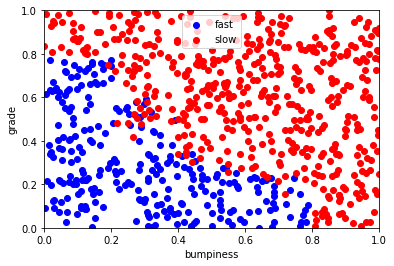

In [4]:
#### initial visualization
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.scatter(bumpy_fast, grade_fast, color = "b", label="fast")
plt.scatter(grade_slow, bumpy_slow, color = "r", label="slow")
plt.legend()
plt.xlabel("bumpiness")
plt.ylabel("grade")
plt.show()
################################################################################

## My Code

#### Adaboost with default parameters
* เริ่มจากการใช้ Adaboost แบบ default มาหาค่า accuracy

In [5]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(random_state=1)
clf.fit(features_train, labels_train) 
pred = clf.predict(features_test)
from sklearn.metrics import accuracy_score
acc = (accuracy_score(pred, labels_test))*100
print('accuracy : %.1f %%' % acc)

accuracy : 92.4 %


#### Tuning parameters of Adaboost
* จากนั้นลองปรับค่า parameters ของ Adaboost (โดยที่จะยังไม่ทำการเปลี่ยนค่า parameters ของ base classifier) ซึ่งเราจะลองปรับด้วยกัน 2 ค่า คือ
    * learning_rate
    * n_estimators

In [6]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
def findMaxAda(learnMin, learnMax, learnStep, n_est_Min, n_est_Max, nStep):
    lr = learnMin
    n_est = n_est_Min
    accMax = 0
    learnRateMax = 0
    n_estMax = 0
    while lr < learnMax:
        n_est = n_est_Min  
        while n_est < n_est_Max:
            clf = AdaBoostClassifier(learning_rate=lr, n_estimators=n_est, random_state=1)
            clf.fit(features_train, labels_train) 
            pred = clf.predict(features_test)
            acc = accuracy_score(pred, labels_test)*100
            if acc > accMax:
                accMax = acc
                learnRateMax = lr
                n_estMax = n_est
            n_est += nStep
        lr += learnStep
    print('LearningRate = %.3f' % learnRateMax + ', n_estimators = %d' % n_estMax + ', accuracy = %.1f %%' % accMax)

In [7]:
findMaxAda(0.1,1,0.1,10,100,10)

LearningRate = 0.200, n_estimators = 60, accuracy = 92.8 %


#### Tuning base classifier parameters of Adaboost (Decision Tree Classifier) to find the best accuracy
* ลองปรับค่าของ Decision Tree Classifier ซึ่งเป็น default ของ Adaboost เพื่อหาค่า accuracy ที่ดีที่สุด ก่อนนำไปใส่ใน Adaboost อีกครั้ง

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
def findMaxDTC(ssMin, ssMax, ssStep):
    accMax = 0
    s_split = 0
    ss = ssMin
    while ss < ssMax:
        clf = DecisionTreeClassifier(min_samples_split=ss, random_state=1)
        clf.fit(features_train, labels_train) 
        pred = clf.predict(features_test)
        acc = accuracy_score(pred, labels_test)*100
        if acc > accMax:
            accMax = acc
            s_split = ss
        ss += ssStep
    print('n sample split = %d' % s_split + ", accuracy = %.1f %%" % accMax)

In [9]:
findMaxDTC(5,100,1)

n sample split = 18, accuracy = 92.4 %


#### Adaboost with Decision Tree tuned parameters
* ทดลองหาค่า accuracy โดยนำ Decision Tree Classifier ที่ทำการปรับค่าแล้ว มาใส่ใน Adaboost ที่เป็น default

In [10]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(min_samples_split=18, random_state=1), random_state=1)
clf.fit(features_train, labels_train) 
pred = clf.predict(features_test)
from sklearn.metrics import accuracy_score
acc = (accuracy_score(pred, labels_test))*100
print('accuracy : %.1f %%' % acc)

accuracy : 92.0 %


ปรากฏว่าค่า accuracy ที่ได้มีค่าลดลง จาก 92.4 % เหลือเพียง 92.0 %

#### Tuning parameters of Adaboost with Decision Tree tuned parameters
* ทดลองหาค่า accuracy โดยนำ Decision Tree Classifier ที่ทำการปรับค่าแล้ว มาใส่ใน Adaboost แล้วทำการปรับค่า parameters ของ Adaboost อีกครั้งหนึ่ง

In [11]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
def findMaxAda(learnMin, learnMax, learnStep, n_est_Min, n_est_Max, nStep):
    lr = learnMin
    n_est = n_est_Min
    accMax = 0
    learnRateMax = 0
    n_estMax = 0
    while lr < learnMax:
        n_est = n_est_Min  
        while n_est < n_est_Max:
            clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(min_samples_split=18, random_state=1), learning_rate=lr, n_estimators=n_est, random_state=1)
            clf.fit(features_train, labels_train) 
            pred = clf.predict(features_test)
            acc = accuracy_score(pred, labels_test)*100
            if acc > accMax:
                accMax = acc
                learnRateMax = lr
                n_estMax = n_est
            n_est += nStep
        lr += learnStep
    print('LearningRate = %.3f' % learnRateMax + ', n_estimators = %d' % n_estMax + ', accuracy = %.1f %%' % accMax)

In [12]:
findMaxAda(0.1,1,0.1,10,100,10)

LearningRate = 0.100, n_estimators = 30, accuracy = 92.8 %


#### Summarize

|           Classifier               |   Accuracy   |
| ---------------------------------- | ------------ |
|Adaboost(default)                   | 92.4 %       |
|Tuned Adaboost                      | 92.8 %       |
|Tuned Decision Tree                 | 92.4 %       |
|Tuned Decision Tree + Adaboost      | 92.0 %       |
|Tuned Decision Tree + Tuned Adaboost| 92.8 %       |

# Compare to SVM

####  Calculation time (Tuned Adaboost with Tuned Decision Tree)
* คำนวณเวลาที่ใช้

In [13]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from time import time
clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(min_samples_split=18, random_state=1), learning_rate=0.1, n_estimators=30, random_state=1)
def train_to_predict():
    t0 = time()
    clf.fit(features_train, labels_train) 
    t1 = time()
    print("training time : %.5f sec" % round(t1-t0,3))
    t0 = time()
    pred = clf.predict(features_test)
    t1 = time()
    print("prediction time : %.5f sec" % round(t1-t0,3))
    from sklearn.metrics import accuracy_score
    acc = (accuracy_score(pred, labels_test))*100
    print('accuracy : %.1f %%' % acc)

train_to_predict()

training time : 0.22800 sec
prediction time : 0.00700 sec
accuracy : 92.8 %


* จากด้านบนมีการ define train_to_predict function โดยเริ่มตั้งแต่ fit ไปจนถึงหาค่า accuracy และหาเวลาที่ใช้ในแต่ละขั้นตอน เพื่อให้โค้ดสั้นลงในการใช้ครั้งต่อไป

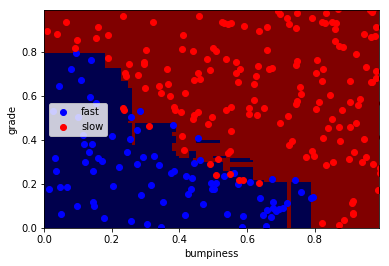

In [14]:
try:
    prettyPicture(clf, features_test, labels_test)
except NameError:
    pass

#### Calculation time and accuracy of SVM (default)
* คำนวณเวลาที่ใช้

In [15]:
from sklearn import svm
from time import time
clf = svm.SVC(random_state=1)
train_to_predict()

training time : 0.01600 sec
prediction time : 0.00300 sec
accuracy : 92.0 %


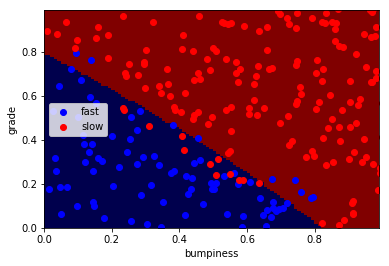

In [16]:
try:
    prettyPicture(clf, features_test, labels_test)
except NameError:
    pass

### Comparison
* ตาางเปรียบเทียบเวลาและ accuracy ระหว่าง SVM(default) กับ Tuned Adaboost

|                | SVM(default) | Tuned Adaboost |
| -------------- | ------------ | -------------- |
|training time   | 0.01900 sec  | 0.21900 sec    |
|prediction time | 0.00500 sec  | 0.00900 sec    |
|accuracy        | 92.0 %       | 92.8 %         |



#  Beat Udacity’s result

หลังจากที่ได้ลองปรับค่า Adaboost แล้ว ยังไม่สามารถหาค่า accuracy ที่มากกว่า Udacity ได้ จึงได้ลองนำ Adaboost ไปใช้กับ base classifier ตัวอื่น เพื่อ beat กับผลของ Udacity

### Beat with Adaboost + SVM
ทำการ beat Udacity ด้วยการนำ SVM มาใช้เป็น base classifier ของ Adaboost

#### Tuning parameters of SVM to find the best accuracy
* ปรับค่า parameters ของ SVM เพื่อหาค่า accuracy ที่ดีที่สุด ก่อนนำไปใช้กับ Adaboost

In [17]:
from sklearn import svm
from sklearn.metrics import accuracy_score
def findMaxSVM(cMin, cMax, cStep, gMin, gMax, gStep):
    c = cMin
    g = gMin
    accMax = 0
    c_at_Max = 0
    g_at_Max = 0
    while c < cMax:
        g = gMin  
        while g < gMax:
            clf = svm.SVC(C=c, kernel='rbf', gamma = g, random_state=1)
            clf.fit(features_train, labels_train) 
            pred = clf.predict(features_test)
            acc = accuracy_score(pred, labels_test)*100
            if acc > accMax:
                accMax = acc
                c_at_Max = c
                g_at_Max = g
            g += gStep
        c += cStep
    print('c = %.1f' % c_at_Max + ', gamma = %.2f' % g_at_Max + ', accuracy = %.1f %%' % accMax)

In [18]:
findMaxSVM(1,30,0.5,1,10,0.5)

c = 19.5, gamma = 9.50, accuracy = 94.8 %


#### Calculation time (SVM)
* คำนวณเวลาที่ใช้

In [19]:
from sklearn import svm
from time import time
clf = svm.SVC(C=19.5, kernel='rbf', gamma = 9.5, random_state=1)
train_to_predict()

training time : 0.00900 sec
prediction time : 0.00200 sec
accuracy : 94.8 %


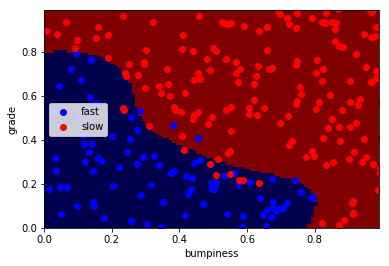

In [20]:
try:
    prettyPicture(clf, features_test, labels_test)
except NameError:
    pass

#### Tuning parameters of Adaboost with SVM tuned parameters
* นำ SVM ที่ผ่านการปรับค่าแล้ว มาเป็น base classifier ของ Adaboost พร้อมทั้งทำการปรับค่า parameters ของ Adaboost

In [21]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score
def findMaxAda(learnMin, learnMax, learnStep, n_est_Min, n_est_Max, nStep):
    lr = learnMin
    n_est = n_est_Min
    accMax = 0
    learnRateMax = 0
    n_estMax = 0
    while lr < learnMax:
        n_est = n_est_Min  
        while n_est < n_est_Max:
            clf = AdaBoostClassifier(base_estimator=svm.SVC(C=19.5, kernel='rbf', gamma = 9.5, random_state=1), algorithm='SAMME', learning_rate=lr, n_estimators=n_est, random_state=1)
            clf.fit(features_train, labels_train) 
            pred = clf.predict(features_test)
            acc = accuracy_score(pred, labels_test)*100
            if acc > accMax:
                accMax = acc
                learnRateMax = lr
                n_estMax = n_est
            n_est += nStep
        lr += learnStep
    print('LearningRate = %.3f' % learnRateMax + ', n_estimators = %d' % n_estMax + ', accuracy = %.1f %%' % accMax)

* จะเห็นว่าตัว algorithm มีการใช้เป็น 'SAMME' แทนค่า 'SAMME.R' ซึ่งเป็นค่า default เนื่องจากว่า SVM นั้น ไม่ support calculation of class probabilities

In [22]:
findMaxAda(0.1,1,0.1,10,100,10)

LearningRate = 0.100, n_estimators = 30, accuracy = 94.4 %


#### Calculation time (Tuned Adaboost with tuned SVM)
* คำนวณเวลาที่ใช้

In [23]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
from time import time
clf = AdaBoostClassifier(base_estimator=svm.SVC(C=19.5, kernel='rbf', gamma = 9.5, random_state=1), algorithm='SAMME', learning_rate=0.1, n_estimators=50, random_state=1)
train_to_predict()

training time : 3.09600 sec
prediction time : 0.40700 sec
accuracy : 94.4 %


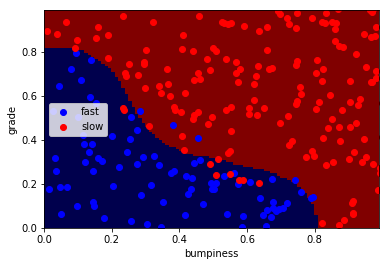

In [24]:
try:
    prettyPicture(clf, features_test, labels_test)
except NameError:
    pass

# Conclusion

    ถ้าเราใช้ Adaboost กับ default parameters จะไม่สามารถหา accuracy ที่มากกว่าของ Udacity (93.6 %) ได้
    แต่ถ้าเราใช้ Adaboost กับ base classifier เช่น SVM จะสามารถหาค่า accuracy ที่มากกว่า Udacity ได้
#### ตารางเปรียบเทียบเวลาและค่า accuray ระหว่าง SVM, Adaboost+SVM และ Udacity's result
(เนื่องจากใน part แรกที่มีการเปรียบเทียบเวลาระหว่าง SVM กับ Adaboost อาจจะยังไม่ชัดเจน เนื่องจาก Adaboost ใช้ base classifier เป็น Decision Tree จึงได้ทำการเปรียบเทียบใหม่อีกครั้ง โดยใช้ SVM เป็น base classifier ของ Adaboost เพื่อที่จะได้เห็นความชัดเจนยิ่งขึ้น)

|                |     SVM     | Adaboost+SVM | Udacity's result |
| -------------- | ----------- | ------------ | ---------------- |
|training time   | 0.01200 sec | 2.92200 sec  |                  |
|prediction time | 0.00200 sec | 0.35000 sec  |                  |
|accuracy        | 94.8 %      | 94.4 %       | 93.6 %           |



# Beat Udacity’s result with Adaboost Part 2
* ลอง beat ค่า accuracy ของ Udacity อีกครั้ง โดยวิธีการเพิ่ม sample size

### Increase sample size from 1000 to 5000, 10000, 15000
* เพิ่มค่าจาก 1000 เป็น 5000 และ 10000

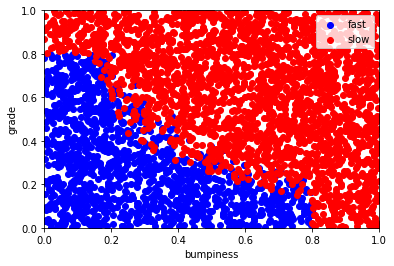

In [25]:
features_train, labels_train, features_test, labels_test = makeTerrainData(5000)

grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==1]
bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==1]

plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.scatter(bumpy_fast, grade_fast, color = "b", label="fast")
plt.scatter(grade_slow, bumpy_slow, color = "r", label="slow")
plt.legend()
plt.xlabel("bumpiness")
plt.ylabel("grade")
plt.show()

### With default Adaboost
* ใช้ Adaboost (default) ในการหาค่า accuracy

In [26]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from time import time
clf = AdaBoostClassifier(random_state=1)
train_to_predict()

training time : 0.38800 sec
prediction time : 0.01900 sec
accuracy : 95.9 %


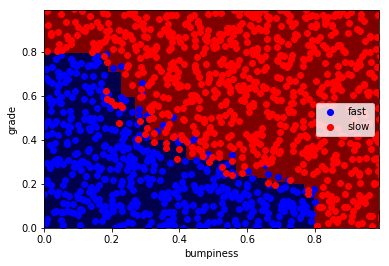

In [27]:
try:
    prettyPicture(clf, features_test, labels_test)
except NameError:
    pass

## Conclusion

หากเราต้องการจะ beat ค่า accurary ของ Udacity ด้วย Adaboost(default) สามารถทำได้โดยการเพิ่ม sample size

|          | Adaboost(Default) | Udacity's result |
| ---------| ----------------- | ---------------- |
|n = 1000  | 92.4 %            | 93.6 %           |
|n = 5000  | 95.9 %            |                  |
|n = 10000 | 96.1 %            |                  |
|n = 15000 | 96.2 %            |                  |

---